In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
# 기온분석
# [검색조건]
# 자료구분 : 년
# 자료형태 : 기본
# 지역/지점 : 서울
# 기간 : 1961~2024

climate = pd.read_csv("./data/ta_climate_6020.csv", encoding='utf8')
climate

,년,지점,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
0,1961,108,12.4,8.1,17.2
1,1962,108,11.7,7.3,16.5
2,1963,108,11.3,7.2,16.0
3,1964,108,12.2,8.4,16.7
4,1965,108,11.4,7.0,16.4
...,...,...,...,...,...
58,2019,108,13.5,9.3,18.5
59,2020,108,13.2,9.4,17.9
60,2021,108,13.7,9.6,18.5
61,2022,108,13.2,9.2,18.0


In [3]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   년          63 non-null     int64  
 1   지점         63 non-null     int64  
 2   평균기온(℃)    63 non-null     float64
 3   평균최저기온(℃)  63 non-null     float64
 4   평균최고기온(℃)  63 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 2.6 KB


In [4]:
df = climate.copy()
idx_80 = df[df["년"] == 1980].index[0]

# 80년대 이후로 df 자르기
df = df[idx_80:]
df = df.reset_index().drop(columns=["index"])
df.head()

,년,지점,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
0,1980,108,10.8,6.8,15.7
1,1981,108,11.2,7.2,15.8
2,1982,108,12.5,8.3,17.4
3,1983,108,12.4,8.3,16.9
4,1984,108,11.6,7.6,16.5


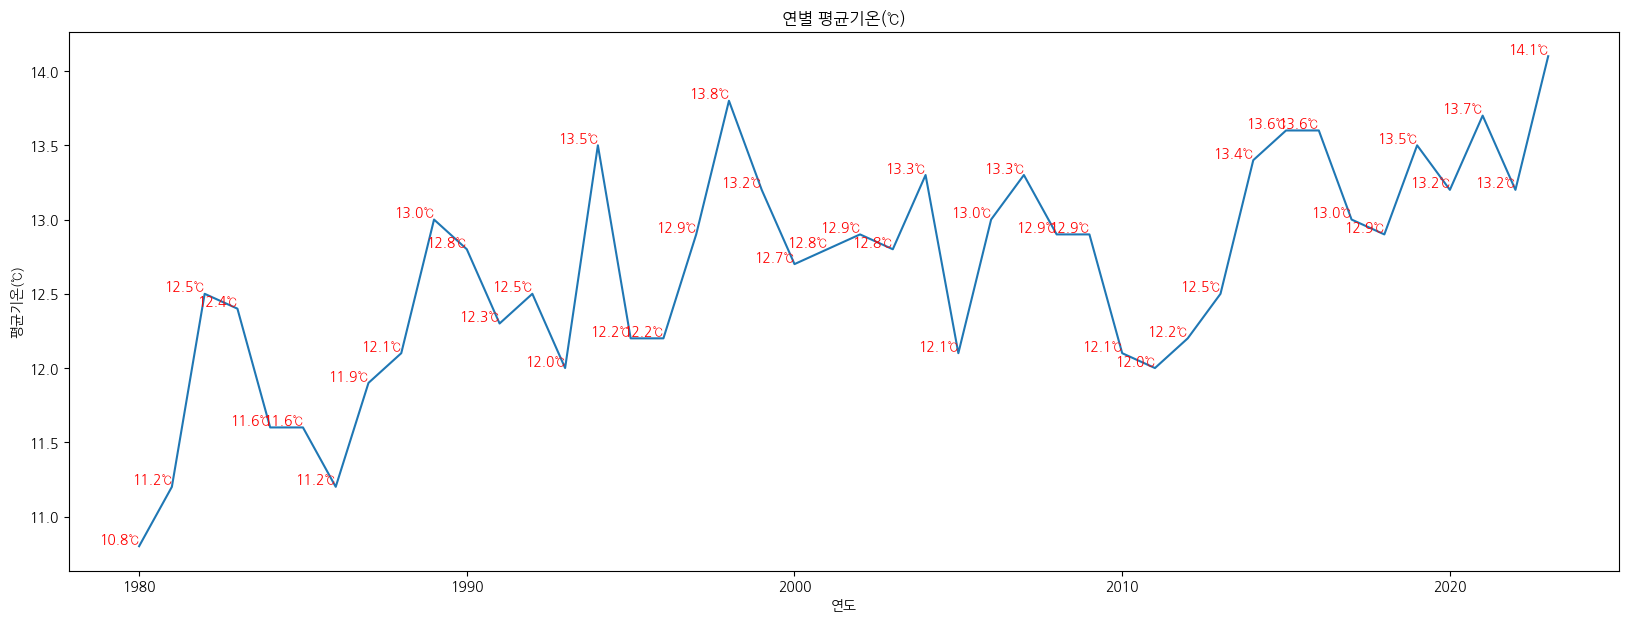

In [5]:
# 나눔글꼴 경로 설정
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name)

plt.figure(figsize=(20, 7))
plt.plot(df["년"], df["평균기온(℃)"])
for i in range(len(df)):
    plt.text(df["년"][i], df["평균기온(℃)"][i], f'{df["평균기온(℃)"][i]:.1f}℃', 
             fontsize=10,
             color='red',
             ha='right', 
             va='bottom')
    
plt.title("연별 평균기온(℃)")
plt.xlabel("연도")
plt.ylabel("평균기온(℃)")
plt.show()

In [6]:
# 기온분석
# [검색조건]
# 자료구분 : 계절
# 자료형태 : 기본
# 지역/지점 : 서울
# 기간 : 1981~2023

winter = pd.read_csv("./data/ta_climate_winter_8020.csv", encoding='utf8')
winter.tail()

,년계절,지점,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
38,2019 겨울,108,1.8,-1.9,6.1
39,2020 겨울,108,0.0,-4.4,4.7
40,2021 겨울,108,-0.9,-5.0,3.8
41,2022 겨울,108,-0.7,-4.7,4.1
42,2023 겨울,108,NaN,NaN,NaN


In [7]:
df_winter = winter[:-1].copy()
df_winter["년계절"] = df_winter["년계절"].apply(lambda x: x[:-3])
df_winter = df_winter.reset_index().drop(columns=["index"])
df_winter.head()

,년계절,지점,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
0,1981,108,-0.9,-4.7,3.5
1,1982,108,-1.2,-4.8,2.9
2,1983,108,-3.5,-7.3,0.8
3,1984,108,-2.4,-6.0,2.2
4,1985,108,-4.0,-7.6,-0.1


c:\Users\yelin\anaconda3\envs\dacon\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


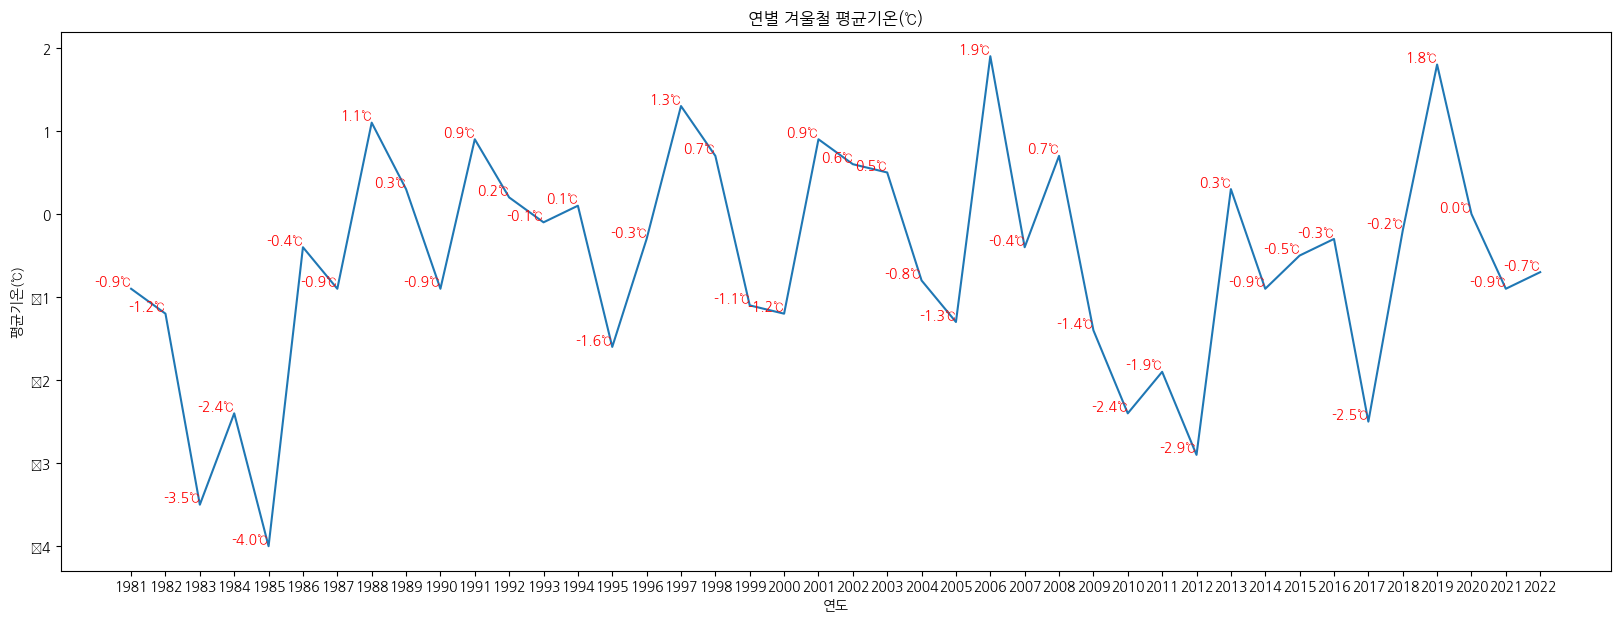

In [8]:
plt.figure(figsize=(20, 7))
plt.plot(df_winter["년계절"], df_winter["평균기온(℃)"])
for i in range(len(df_winter)):
    plt.text(df_winter["년계절"][i], df_winter["평균기온(℃)"][i], f'{df_winter["평균기온(℃)"][i]:.1f}℃', 
             fontsize=10,
             color='red',
             ha='right', 
             va='bottom')

plt.title("연별 겨울철 평균기온(℃)")
plt.xlabel("연도")
plt.ylabel("평균기온(℃)")
plt.show()

In [9]:
# 기온분석
# [검색조건]
# 자료구분 : 계절
# 자료형태 : 기본
# 지역/지점 : 서울
# 기간 : 1981~2023

spring = pd.read_csv("./data/ta_climate_spring_8020.csv", encoding='utf8')

df_spring = spring.copy()
df_spring["년계절"] = df_spring["년계절"].apply(lambda x: x.split()[0])
df_spring = df_spring.reset_index().drop(columns=["index"])
df_spring.head()

,년계절,지점,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
0,1981,108,11.2,6.5,16.7
1,1982,108,12.0,7.6,17.3
2,1983,108,12.8,7.9,18.0
3,1984,108,10.9,6.5,16.4
4,1985,108,11.3,6.7,17.0


In [10]:
# 기온분석
# [검색조건]
# 자료구분 : 계절
# 자료형태 : 기본
# 지역/지점 : 서울
# 기간 : 1981~2023

summer = pd.read_csv("./data/ta_climate_summer_8020.csv", encoding='utf8')

df_summer = summer.copy()
df_summer["년계절"] = df_summer["년계절"].apply(lambda x: x.split()[0])
df_summer = df_summer.reset_index().drop(columns=["index"])
df_summer.head()

,년계절,지점,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
0,1981,108,23.9,20.4,28.3
1,1982,108,24.1,20.4,28.9
2,1983,108,23.9,20.4,28.2
3,1984,108,24.7,21.2,29.2
4,1985,108,24.6,21.1,29.0


In [11]:
# 기온분석
# [검색조건]
# 자료구분 : 계절
# 자료형태 : 기본
# 지역/지점 : 서울
# 기간 : 1981~2023

autumn = pd.read_csv("./data/ta_climate_autumn_8020.csv", encoding='utf8')

df_autumn = autumn.copy()
df_autumn["년계절"] = df_autumn["년계절"].apply(lambda x: x.split()[0])
df_autumn = df_autumn.reset_index().drop(columns=["index"])
df_autumn.head()

,년계절,지점,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
0,1981,108,12.3,8.2,16.9
1,1982,108,14.8,10.0,20.2
2,1983,108,14.3,10.4,18.7
3,1984,108,14.0,9.8,19.1
4,1985,108,13.5,10.0,17.7


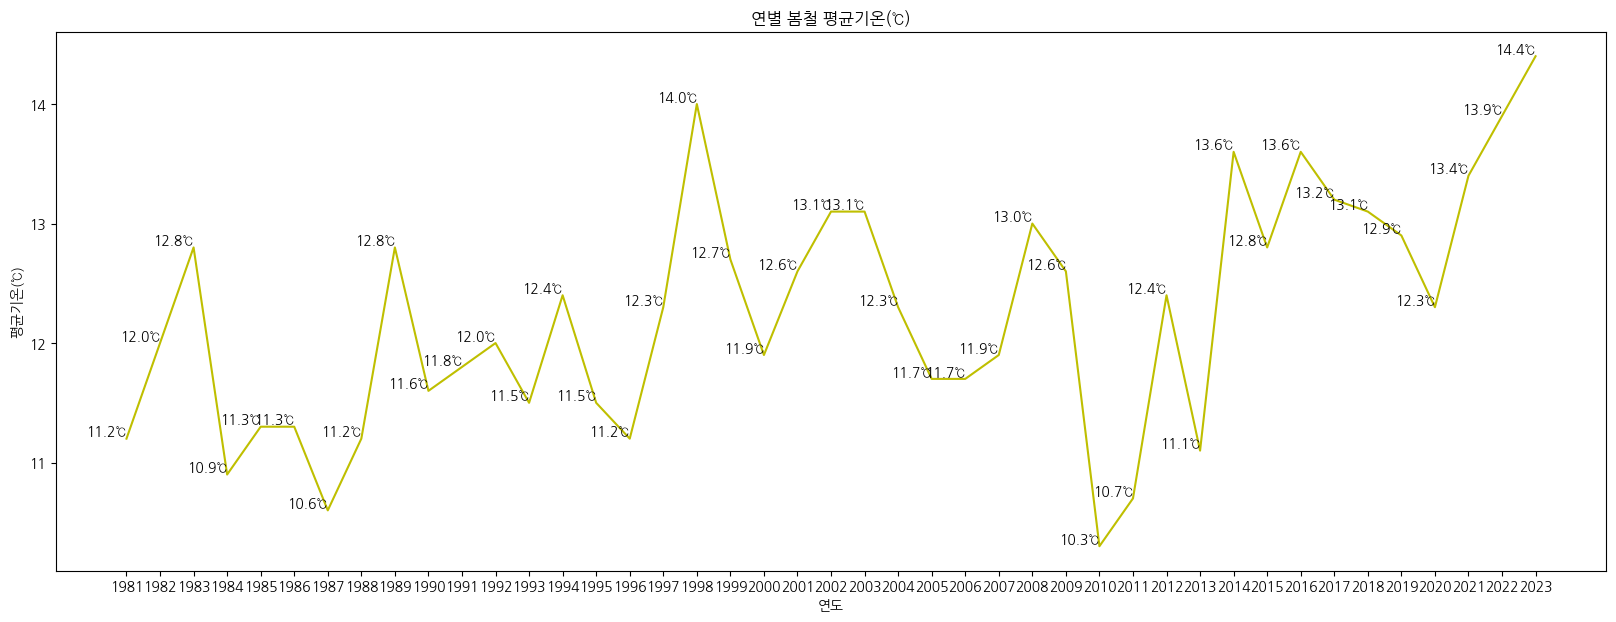

In [12]:
plt.figure(figsize=(20, 7))
plt.plot(df_spring["년계절"], df_spring["평균기온(℃)"], color='y')
for i in range(len(df_spring)):
    plt.text(df_spring["년계절"][i], df_spring["평균기온(℃)"][i], f'{df_spring["평균기온(℃)"][i]:.1f}℃', 
             fontsize=10,
             color='black',
             ha='right', 
             va='bottom')

plt.title("연별 봄철 평균기온(℃)")
plt.xlabel("연도")
plt.ylabel("평균기온(℃)")
plt.show()

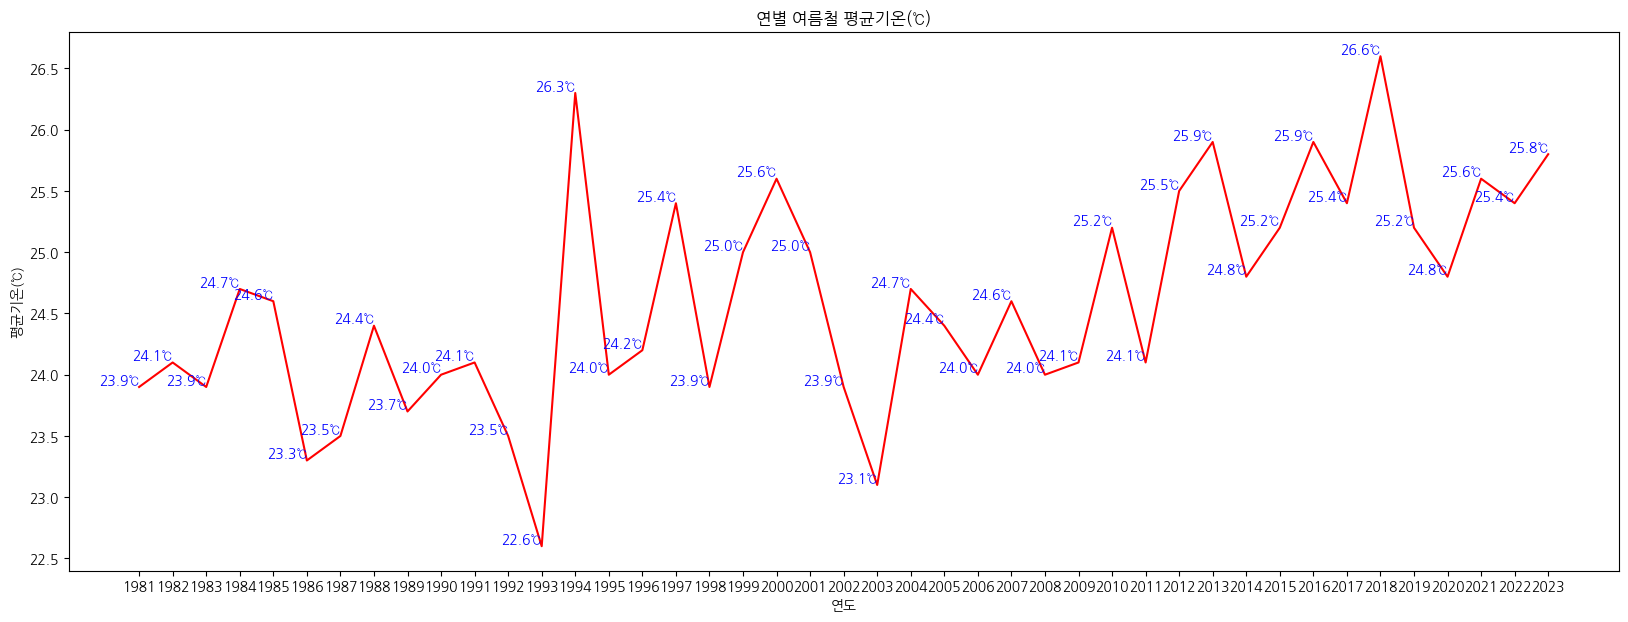

In [13]:
plt.figure(figsize=(20, 7))
plt.plot(df_summer["년계절"], df_summer["평균기온(℃)"], color='r')
for i in range(len(df_summer)):
    plt.text(df_summer["년계절"][i], df_summer["평균기온(℃)"][i], f'{df_summer["평균기온(℃)"][i]:.1f}℃', 
             fontsize=10,
             color='blue',
             ha='right', 
             va='bottom')

plt.title("연별 여름철 평균기온(℃)")
plt.xlabel("연도")
plt.ylabel("평균기온(℃)")
plt.show()

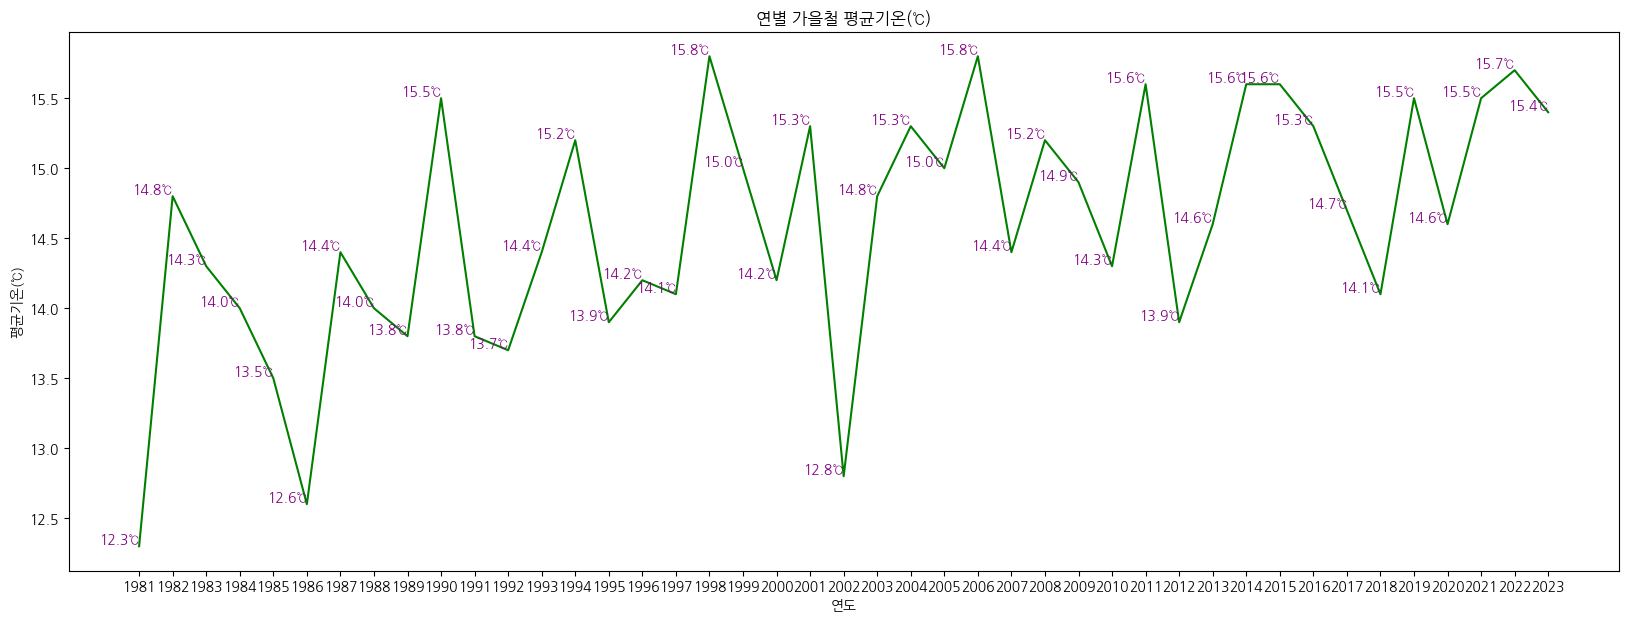

In [14]:
plt.figure(figsize=(20, 7))
plt.plot(df_autumn["년계절"], df_autumn["평균기온(℃)"], color='g')
for i in range(len(df_autumn)):
    plt.text(df_summer["년계절"][i], df_autumn["평균기온(℃)"][i], f'{df_autumn["평균기온(℃)"][i]:.1f}℃', 
             fontsize=10,
             color='purple',
             ha='right', 
             va='bottom')

plt.title("연별 가을철 평균기온(℃)")
plt.xlabel("연도")
plt.ylabel("평균기온(℃)")
plt.show()